In [1]:
from FSC import *
import mrcfile
import matplotlib.pyplot as plt
import time
import pandas as pd
import os

In [2]:
# Working with file structure to analyze multiple datasets

data_path = '/Users/atk42/OneDrive - Yale University/Lab/Projects/TEM_tomo/tomo_data'
tomo_lst = 'tomograms_lst - Local Tomograms for FSC.csv'
tomo_lst_path = os.sep.join([data_path, tomo_lst])

df = pd.read_csv(tomo_lst_path)

df

,Tomogram,Label,PID,EXPID,MPID,ccdbprod,Thickness,Series,Tilts/Series,Magnification,Scope/Detector,Unnamed: 11,PIxel Size (A),Pixel Size bin 4 (nm),FSC res (vxl),Notes,Unnamed: 16
0,MouseCerebellum_A6S1_SA3.3k_de64_tomo1,A6S1#1,20471,5403572,5403638,28,1.5um,NaN,481,3.3k,Halo/DE64,fpb-bin4,12.27,4.908,3.75,121 60deg a/b,231221.0
1,MouseCerebellum_A2S1_SA3.3k_de64_tomo1,A2S1#1,20471,5403572,5403586,28,500nm,NaN,481,3.3k,Halo/DE64,fpb-bin4,12.27,4.908,NaN,NaN,NaN


In [8]:
row = df.iloc[0]
proj = 'microscopy_%i' % int(row['MPID'])
tomo = row['Tomogram']
tomo_path = os.sep.join([data_path, proj, 'processed_data',tomo,'txbr-backprojection','limited-bin4'])
num_ang = 121
max_ang = 60
a_dir = os.sep.join([tomo_path,'%i-limited[%.1f_-%.1f]_fsc-a' % (num_ang,max_ang,max_ang)])
if len(os.listdir(a_dir)) == 1:
    a_path = os.sep.join([a_dir,os.listdir(a_dir)[0]])
else:
    print('tomo does not have exactly 1 output file: ')
    print(os.listdir(a_dir))
    a_path = None
print(a_path)

b_dir = os.sep.join([tomo_path,'%i-limited[%.1f_-%.1f]_fsc-b' % (num_ang,max_ang,max_ang)])
if len(os.listdir(b_dir)) == 1:
    b_path = os.sep.join([b_dir,os.listdir(a_dir)[0]])
else:
    print('tomo dir does not have exactly 1 output file: ')
    print(os.listdir(b_dir))
    b_path = None
print(b_path)

/Users/atk42/OneDrive - Yale University/Lab/Projects/TEM_tomo/tomo_data/microscopy_5403638/processed_data/MouseCerebellum_A6S1_SA3.3k_de64_tomo1/txbr-backprojection/limited-bin4/121-limited[60.0_-60.0]_fsc-a/MouseCerebellum_A6S1_SA3.3k_de64_tomo1a_z_-185.0.out
/Users/atk42/OneDrive - Yale University/Lab/Projects/TEM_tomo/tomo_data/microscopy_5403638/processed_data/MouseCerebellum_A6S1_SA3.3k_de64_tomo1/txbr-backprojection/limited-bin4/121-limited[60.0_-60.0]_fsc-b/MouseCerebellum_A6S1_SA3.3k_de64_tomo1a_z_-185.0.out


In [9]:
from resolution_measure_mrc import *
ofn = 'test_FSC_1.5um.csv'
resolution_measure(a_path, b_path, 4, 50, pixel_size = 1, sub_region = 200, ofn=ofn)

Estimating the resolution by FSC...
Base arguments: {'fn1': '/Users/atk42/OneDrive - Yale University/Lab/Projects/TEM_tomo/tomo_data/microscopy_5403638/processed_data/MouseCerebellum_A6S1_SA3.3k_de64_tomo1/txbr-backprojection/limited-bin4/121-limited[60.0_-60.0]_fsc-a/MouseCerebellum_A6S1_SA3.3k_de64_tomo1a_z_-185.0.out', 'fn2': '/Users/atk42/OneDrive - Yale University/Lab/Projects/TEM_tomo/tomo_data/microscopy_5403638/processed_data/MouseCerebellum_A6S1_SA3.3k_de64_tomo1/txbr-backprojection/limited-bin4/121-limited[60.0_-60.0]_fsc-b/MouseCerebellum_A6S1_SA3.3k_de64_tomo1a_z_-185.0.out', 'cube_size': 50, 'snrt': 0.2071, 'rt': 6, 'rad_apod': 60, 'ax_apod': 60, 'pixel_size': 1, 'savefig': False, 'prefix': ''}
Running across 4 cores


100%|██████████| 64/64 [05:40<00:00,  5.32s/it]

Outputting to test_FSC_1.5um.csv


In [24]:
data_path = '/Users/atk42/OneDrive - Yale University/Lab/Projects/TEM_tomo/tomo_data/'

a_path = data_path+'microscopy_5403586'+'/'+'processed_data'+'/'+'MouseCerebellum_A2S1_SA3.3k_de64_tomo1'+ \
    '/' +'txbr-backprojection/limited-bin4'+'/'+'121-limited[60.0_-60.0]_fsc-a'+'/'+'MouseCerebellum_A2S1_SA3.3k_de64_tomo1a_z_-69.0.out'
b_path = data_path+'microscopy_5403586'+'/'+'processed_data'+'/'+'MouseCerebellum_A2S1_SA3.3k_de64_tomo1'+ \
    '/' +'txbr-backprojection/limited-bin4'+'/'+'121-limited[60.0_-60.0]_fsc-b'+'/'+'MouseCerebellum_A2S1_SA3.3k_de64_tomo1a_z_-69.0.out'
print(a_path)
print(b_path)

/Users/atk42/OneDrive - Yale University/Lab/Projects/TEM_tomo/tomo_data/microscopy_5403586/processed_data/MouseCerebellum_A2S1_SA3.3k_de64_tomo1/txbr-backprojection/limited-bin4/121-limited[60.0_-60.0]_fsc-a/MouseCerebellum_A2S1_SA3.3k_de64_tomo1a_z_-69.0.out
/Users/atk42/OneDrive - Yale University/Lab/Projects/TEM_tomo/tomo_data/microscopy_5403586/processed_data/MouseCerebellum_A2S1_SA3.3k_de64_tomo1/txbr-backprojection/limited-bin4/121-limited[60.0_-60.0]_fsc-b/MouseCerebellum_A2S1_SA3.3k_de64_tomo1a_z_-69.0.out


In [37]:
#mrcfile.validate(path)
with mrcfile.open(a_path) as mrc:
    a = mrc.data
with mrcfile.open(b_path) as mrc:
    b = mrc.data
print(a.shape, b.shape)

(130, 2065, 2067) (130, 2065, 2067)


--- 3.0877089500427246 seconds ---


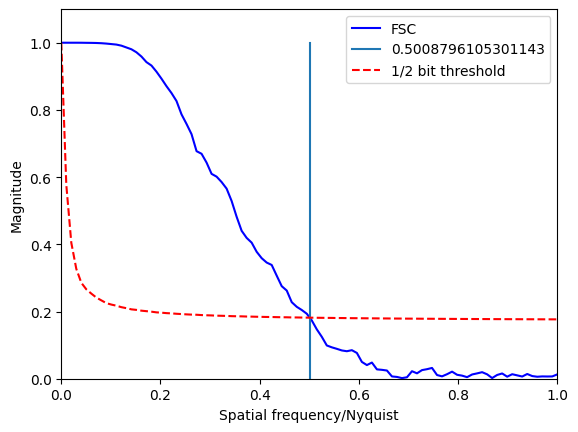

In [44]:
start_time = time.time()

a_crop = a[:199,:199,:199]
b_crop = b[:199,:199,:199]
#plt.imshow(xy_img)
fsc_vol = FSCPlot(a_crop,b_crop)
fsc_vol.plot()

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.2701420783996582 seconds ---


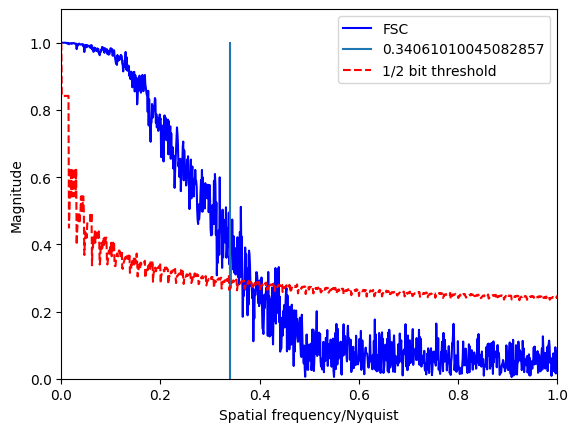

In [40]:

start_time = time.time()

xy_img_a = a[:,1000,:]
xy_img_b = b[:,1000,:]
#plt.imshow(xy_img)
fsc_vol = FSCPlot(xy_img_a, xy_img_b)
fsc_vol.plot()

print("--- %s seconds ---" % (time.time() - start_time))


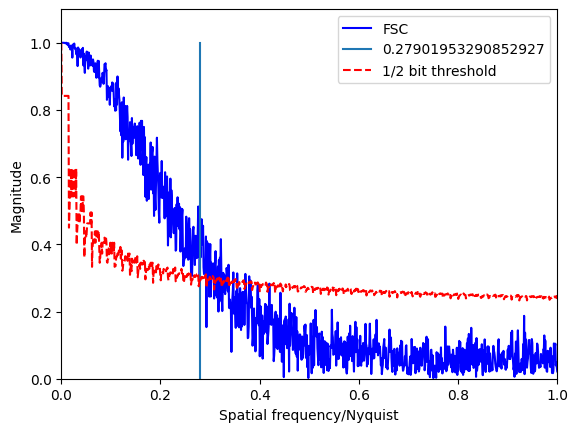

In [35]:
xz_img_a = a[:,:,1002]
xz_img_b = b[:,:,1002]
#plt.imshow(xy_img)
fsc_vol = FSCPlot(xz_img_a, xz_img_b)
fsc_vol.plot()

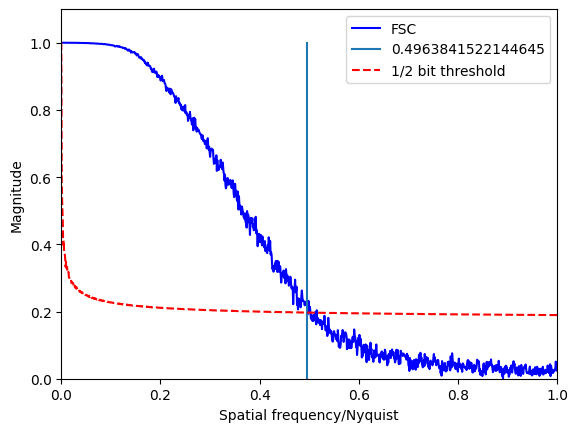

In [39]:
yz_img_a = a[70,:,:]
yz_img_b = b[70,:,:]
#plt.imshow(xy_img)
fsc_vol = FSCPlot(yz_img_a, yz_img_b)
fsc_vol.plot()